In [51]:
import numpy as np

NUM_EPOCHS = 10000
NUM_USERS = 100
ENTRANCE_FEE = 9 #USDT
TOKEN_RANGE = 50
TOKEN_SIZE = 6
NUM_TICKETS = 3
WIN_AMOUNT = [0, 0, 10, 15, 20, 0, 0]
FIXED = [True, True, True, True, True, True, True]
REF_WIN_AMOUNT = [0, 0, 2, 4, 7, 0, 0]
LOTTERY_TOKENS = 1+np.random.choice(TOKEN_RANGE-1, TOKEN_SIZE)

def lottery_score(tok1, tok2):
    score = 0
    for i in range(TOKEN_SIZE):
        if tok1[i] in tok2:
            score += 1
    return score


def get_user(user_id):
    for u in users:
        if u.id == user_id:
            return u
    return None


class User:
    def __init__(self, user_id, referer_id):
        self.id = user_id
        self.referer = referer_id
        self.tokens = [1+np.random.choice(TOKEN_RANGE-1, TOKEN_SIZE) for _ in range(NUM_TICKETS)]
        self.satisfaction = -ENTRANCE_FEE
        self.score = [lottery_score(self.tokens[i], LOTTERY_TOKENS) for i in range(NUM_TICKETS)]
        self.free_play = False#True if np.random.rand() < TOKEN_SIZE/TOKEN_RANGE else False

all_size_winners = []
all_satisfied = []
all_bank = []
for _ in range(NUM_EPOCHS):
    # Generate random users
    users = []
    id = 1
    users.append(User(id, 0))
    id += 1
    while len(users) < NUM_USERS:
        referer = users[np.random.randint(0, len(users))]
        users.append(User(id, referer.id))
        id += 1
    bank = ENTRANCE_FEE * (NUM_USERS - sum([int(user.free_play) for user in users]))
    # Pick winners
    referers_won = []
    size_winners = (TOKEN_SIZE+1)*[0]
    for user in users:
        for score in user.score:
            size_winners[score] += 1
    for user in users:
        for score in user.score:
            if WIN_AMOUNT[score] > 0:
                if FIXED[score]:
                    user.satisfaction += WIN_AMOUNT[score]
                    bank -= WIN_AMOUNT[score]
                    if user.referer != 0:
                        if user.referer not in referers_won:
                            referers_won.append(user.referer)
                        referer_user = users[user.referer-1] #get_user(user.referer)
                        referer_user.satisfaction += REF_WIN_AMOUNT[score]
                        bank -= REF_WIN_AMOUNT[score]
                else:
                    user.satisfaction += WIN_AMOUNT[score] / size_winners[score]
                    bank -= WIN_AMOUNT[score] / size_winners[score]
                    if user.referer != 0:
                        if user.referer not in referers_won:
                            referers_won.append(user.referer)
                        referer_user = users[user.referer-1] #get_user(user.referer)
                        referer_user.satisfaction += REF_WIN_AMOUNT[score] / size_winners[score]
                        bank -= REF_WIN_AMOUNT[score] / size_winners[score]
    all_bank.append(bank)
    all_size_winners.append(size_winners)
    # Show users data
    satisfied = 0
    for user in users:
        if user.satisfaction >= 0:
            satisfied += 1
    all_satisfied.append(satisfied)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,
          3.,   7.,   8.,   3.,   9.,   7.,  18.,  17.,  17.,  18.,  20.,
         23.,  27.,  37.,  26.,  57.,  37.,  58.,  55.,  71.,  74.,  78.,
        115., 114., 132., 126., 158., 137., 163., 210., 174., 231., 177.,
        244., 223., 316., 238., 287., 294., 246., 306., 272., 324., 264.,
        317., 241., 296., 260., 237., 266., 255., 264., 189., 238., 221.,
        227., 179., 177., 135., 124., 141.,  89., 114.,  97.,  75.,  60.,
         48.,  53.,  40.,  46.,  41.,  26.,  22.,  18.,  20.,  22.,  10.,
          5.,   3.,   4.,   3.,   1.,   1.,   4.,   1.,   0.,   1.,   0.,
          1.]),
 array([-86.  , -79.55, -73.1 , -66.65, -60.2 , -53.75, -47.3 , -40.85,
        -34.4 , -27.95, -21.5 , -15.05,  -8.6 ,  -2.15,   4.3 ,  10.75,
         17.2 ,  23.65,  30.1 ,  36.55,  43.  ,  49.45,  55.9 ,  62.35,
         68.8 ,  75.25,  81.7 ,  88.15,  94.6 , 101.05, 107.5 , 113.95,
        120.4 , 126.85, 133.3 

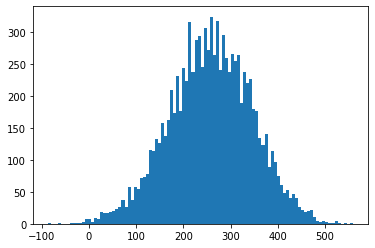

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plt.hist(all_satisfied, density=False, bins=100)
plt.hist(all_bank, density=False, bins=100)

In [54]:
size_winners

[137, 111, 43, 9, 0, 0, 0]